In [80]:
import requests
import pandas as pd
from pandas import json_normalize
import csv
import time
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


In [2]:
# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
def get_data(year,month):
    ticker="GOOGL"
    #apikey=read("alpha access key.txt")

    f=open("alpha access key.txt", "r");
    apikey=f.read()
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol='+ticker+'&interval=1min&slice=year'+str(year)+'month'+str(month)+'&apikey='+apikey
   

    with requests.Session() as s:
        download = s.get(url)
        decoded_content = download.content.decode('utf-8')
        cr = csv.reader(decoded_content.splitlines(), delimiter=',')
        my_list = list(cr)
    return my_list


In [3]:
def create_df(my_list):
    df_data=pd.DataFrame(my_list[1:])
    df_data.columns=my_list[0]
    return df_data

In [5]:
df_final=pd.DataFrame(columns=['time', 'open', 'high', 'low', 'close', 'volume'])
for i in range(1,3):
    for j in range (1,13):
        my_list=get_data(i,j)
        print(i,j)
        print('downloaded data')
        df_data=create_df(my_list)
        print(i,j)
        print('dataframe created')
        df_final=df_final.append(df_data,ignore_index=True)
        
      
        time.sleep(20)
df_final=df_final.drop(columns=['volume'])
df_final.to_csv('GOOGL_2years_minuteData.csv')

1 1
downloaded data
1 1
dataframe created
1 2
downloaded data
1 2
dataframe created
1 3
downloaded data
1 3
dataframe created
1 4
downloaded data
1 4
dataframe created
1 5
downloaded data
1 5
dataframe created
1 6
downloaded data
1 6
dataframe created
1 7
downloaded data
1 7
dataframe created
1 8
downloaded data
1 8
dataframe created


ChunkedEncodingError: ("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read))

In [126]:
df_cons=pd.read_excel("C:/Users/Babitha Govindaiah/Desktop/Machine Learning/DATA TECH/Consolidated.xlsx",sheet_name="Consolidated")

In [127]:
df_cons['Date']=pd.to_datetime(df_cons['Date'],errors = 'coerce')
df_cons['Time']=pd.to_datetime(df_cons['Time'],format='%H:%M:%S',errors = 'coerce').dt.time
df_cons["DateTime"]=pd.to_datetime((df_cons["Date"].astype(str) + ' ' + df_cons["Time"].astype(str)),format='%Y-%m-%d %H:%M:%S',errors = 'coerce')

In [135]:
df_cons_clean=df_cons[(df_cons["Date"].apply(str))!='NaT']

In [136]:
amz_x=df_cons_clean[df_cons_clean["Company"]=='Amazon']["DateTime"]
amz_y=df_cons_clean[df_cons_clean["Company"]=='Amazon']["close"]

goo_x=df_cons_clean[df_cons_clean["Company"]=='Google']["DateTime"]
goo_y=df_cons_clean[df_cons_clean["Company"]=='Google']["close"]

nt_x=df_cons_clean[df_cons_clean["Company"]=='Netflix']["DateTime"]
nt_y=df_cons_clean[df_cons_clean["Company"]=='Netflix']["close"]

meta_x=df_cons_clean[df_cons_clean["Company"]=='Meta']["DateTime"]
meta_y=df_cons_clean[df_cons_clean["Company"]=='Meta']["close"]

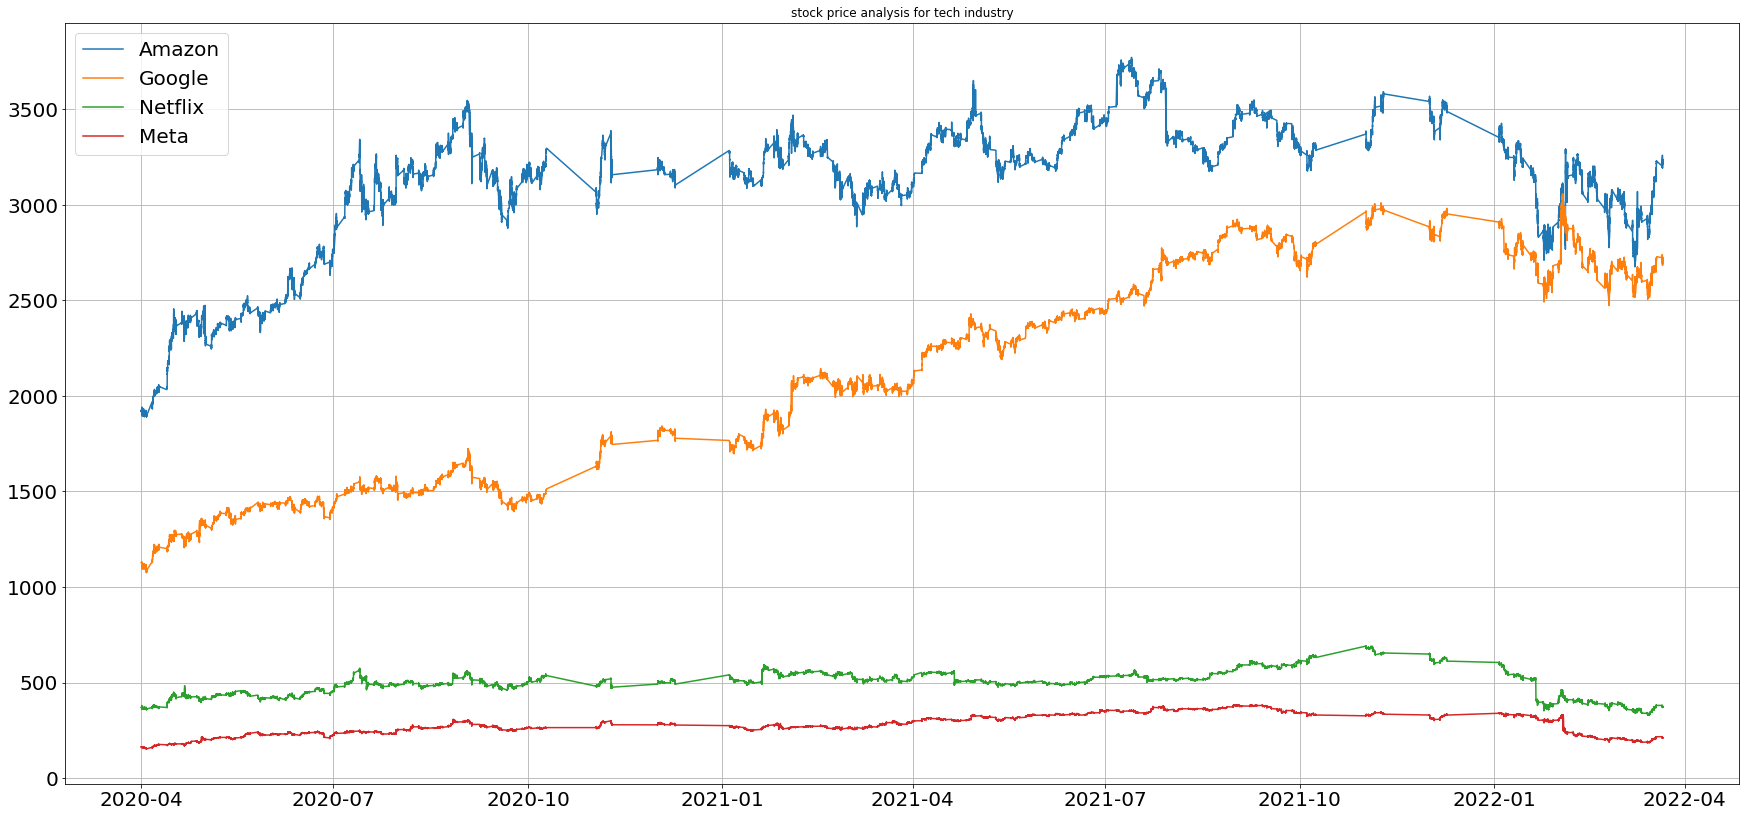

In [146]:
plt.figure(figsize=(30, 14))
plt.plot(amz_x, amz_y, label = "Amazon")
plt.plot(goo_x, goo_y, label = "Google")
plt.plot(nt_x,nt_y, label = "Netflix")
plt.plot(meta_x,meta_y, label = "Meta")
plt.title("stock price analysis for tech industry")
plt.legend(prop={'size': 20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

In [73]:
df_cons[df_cons["Data.Company"]=='Google']

,Data.Company,Data.Date,Data.Time,Data.open,Data.high,Data.low,Data.close,Data.DateTime
534201,Google,2022-03-21,NaT,2722.0300,2722.0300,2722.0300,2722.0300,NaT
534202,Google,2022-03-21,NaT,2723.9999,2723.9999,2723.9999,2723.9999,NaT
534203,Google,2022-03-21,NaT,2723.0000,2723.0000,2723.0000,2723.0000,NaT
534204,Google,2022-03-21,NaT,2722.3500,2722.3500,2722.3000,2722.3000,NaT
534205,Google,2022-03-21,NaT,2722.3400,2722.3400,2722.3400,2722.3400,NaT
...,...,...,...,...,...,...,...,...
731565,Google,2020-04-01,NaT,1130.8500,1130.8500,1130.8500,1130.8500,NaT
731566,Google,2020-04-01,NaT,1133.0200,1133.0200,1130.7000,1130.7000,NaT
731567,Google,2020-04-01,NaT,1129.2500,1129.2500,1129.2500,1129.2500,NaT
731568,Google,2020-04-01,NaT,1131.0900,1131.5600,1131.0000,1131.0000,NaT
